In [1]:
# Dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [2]:
# Create engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)
conn = engine.connect()

In [3]:
# get table tames
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [4]:
 # Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id BIGINT
station TEXT
date TEXT
prcp FLOAT
tobs BIGINT


In [5]:
 # Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
# columns

id BIGINT
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [6]:
# running a query
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(0, 'USC00519397', '2010-01-01', 0.08, 65),
 (1, 'USC00519397', '2010-01-02', 0.0, 63),
 (2, 'USC00519397', '2010-01-03', 0.0, 74),
 (3, 'USC00519397', '2010-01-04', 0.0, 76),
 (4, 'USC00519397', '2010-01-07', 0.06, 70)]

In [7]:
 # Reflect Database into ORM class
    # Couldn't get refelctions to ever work
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement

AttributeError: measurement

In [8]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [9]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [10]:
# Print all of the classes mapped to the Base
Base.classes.keys()

[]

In [11]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [12]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [13]:
 # Reflect Database into ORM class
    # Couldn't get refelctions to ever work
Base = automap_base()
Base.prepare(engine, reflect=True)
#meas = Base.classes.measurement
stat = Base.classes.station

AttributeError: station

In [14]:
session = Session(engine)

In [15]:
#reviewing data
engine.execute('select * from measurement').fetchall()

[(0, 'USC00519397', '2010-01-01', 0.08, 65),
 (1, 'USC00519397', '2010-01-02', 0.0, 63),
 (2, 'USC00519397', '2010-01-03', 0.0, 74),
 (3, 'USC00519397', '2010-01-04', 0.0, 76),
 (4, 'USC00519397', '2010-01-07', 0.06, 70),
 (5, 'USC00519397', '2010-01-08', 0.0, 64),
 (6, 'USC00519397', '2010-01-09', 0.0, 68),
 (7, 'USC00519397', '2010-01-10', 0.0, 73),
 (8, 'USC00519397', '2010-01-11', 0.01, 64),
 (9, 'USC00519397', '2010-01-12', 0.0, 61),
 (10, 'USC00519397', '2010-01-14', 0.0, 66),
 (11, 'USC00519397', '2010-01-15', 0.0, 65),
 (12, 'USC00519397', '2010-01-16', 0.0, 68),
 (13, 'USC00519397', '2010-01-17', 0.0, 64),
 (14, 'USC00519397', '2010-01-18', 0.0, 72),
 (15, 'USC00519397', '2010-01-19', 0.0, 66),
 (16, 'USC00519397', '2010-01-20', 0.0, 66),
 (17, 'USC00519397', '2010-01-21', 0.0, 69),
 (18, 'USC00519397', '2010-01-22', 0.0, 67),
 (19, 'USC00519397', '2010-01-23', 0.0, 67),
 (20, 'USC00519397', '2010-01-24', 0.01, 71),
 (21, 'USC00519397', '2010-01-25', 0.0, 67),
 (22, 'USC005193

In [16]:
 # creating a dataframe
measurement_df = pd.read_sql("SELECT * FROM measurement", conn)

In [17]:
#reviewing dataframe
measurement_df.head()

,id,station,date,prcp,tobs
0,0,USC00519397,2010-01-01,0.08,65
1,1,USC00519397,2010-01-02,0.00,63
2,2,USC00519397,2010-01-03,0.00,74
3,3,USC00519397,2010-01-04,0.00,76
4,4,USC00519397,2010-01-07,0.06,70


In [18]:
#Running query with only Date and PRCP for a year
precip_df = engine.execute('SELECT date,prcp FROM measurement where date >= "2016-01-01" and date <= "2016-12-31"').fetchall()

In [19]:
#Putting data into dataframe
precip_df = pd.DataFrame(precip_df,columns=['date', 'prcp'])
precip_df.head()

,date,prcp
0,2016-01-01,0.0
1,2016-01-02,0.0
2,2016-01-03,0.0
3,2016-01-04,0.0
4,2016-01-05,0.0


In [20]:
#setting date column to index
precip_df.set_index('date')

,prcp
date,
2016-01-01,0.00
2016-01-02,0.00
2016-01-03,0.00
2016-01-04,0.00
2016-01-05,0.00
2016-01-06,0.00
2016-01-07,0.18
2016-01-08,0.01
2016-01-09,0.03


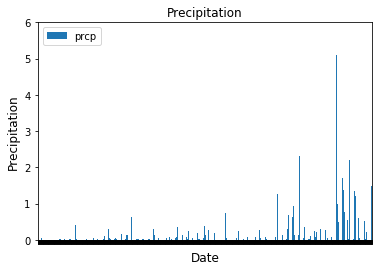

In [21]:
#plotting results
ax = precip_df.plot(kind='bar', title ="Precipitation")
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Precipitation", fontsize=12)
plt.ylim(0,6)
ax.set_xticklabels([])
plt.show()

In [22]:
#Displaying results
precip_df

,date,prcp
0,2016-01-01,0.00
1,2016-01-02,0.00
2,2016-01-03,0.00
3,2016-01-04,0.00
4,2016-01-05,0.00
5,2016-01-06,0.00
6,2016-01-07,0.18
7,2016-01-08,0.01
8,2016-01-09,0.03
9,2016-01-10,0.01


In [23]:
#Design a query to calculate the total number of stations
engine.execute('SELECT count(DISTINCT station) from measurement ').fetchall()

[(9,)]

In [24]:
#Design a query to find the most active stations

#List the stations and observation counts in descending order
engine.execute('SELECT station,count(station) from measurement group by station order by count(station) desc').fetchall()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [25]:
#Which station has the highest number of observations
engine.execute('SELECT station,count(station) from measurement group by station order by count(station) desc limit 1').fetchall()

[('USC00519281', 2772)]

In [26]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
#using station found from previous query
temp = engine.execute('SELECT date,tobs FROM measurement where date >= "2016-01-01" and date <= "2016-12-31" and station = "USC00519281"').fetchall()

In [27]:
#putting into dataframe
temp_df = pd.DataFrame(temp,columns=['date', 'tobs'])
temp_df.head()

,date,tobs
0,2016-01-01,74
1,2016-01-02,72
2,2016-01-03,68
3,2016-01-04,69
4,2016-01-05,70


In [28]:
#setting bins
bins = [0,60,65,70,75,80,85,90,95,100,105,110]
pd.cut(temp_df["tobs"], bins)

0      (70, 75]
1      (70, 75]
2      (65, 70]
3      (65, 70]
4      (65, 70]
5      (65, 70]
6      (75, 80]
7      (70, 75]
8      (70, 75]
9      (70, 75]
10     (70, 75]
11     (70, 75]
12     (70, 75]
13     (65, 70]
14     (70, 75]
15     (70, 75]
16     (70, 75]
17     (60, 65]
18     (60, 65]
19     (60, 65]
20     (60, 65]
21     (60, 65]
22     (70, 75]
23     (75, 80]
24     (65, 70]
25     (60, 65]
26     (65, 70]
27     (60, 65]
28     (65, 70]
29     (70, 75]
         ...   
336    (65, 70]
337    (70, 75]
338    (65, 70]
339    (65, 70]
340    (65, 70]
341    (65, 70]
342    (65, 70]
343    (65, 70]
344    (65, 70]
345    (65, 70]
346    (65, 70]
347    (60, 65]
348    (65, 70]
349    (60, 65]
350    (70, 75]
351    (65, 70]
352    (65, 70]
353    (75, 80]
354    (75, 80]
355    (70, 75]
356    (70, 75]
357    (70, 75]
358    (70, 75]
359    (70, 75]
360    (70, 75]
361    (70, 75]
362    (70, 75]
363    (70, 75]
364    (65, 70]
365    (65, 70]
Name: tobs, Length: 366,

In [29]:
temp_df["bin"] = pd.cut(
    temp_df["tobs"], bins)
temp_df

,date,tobs,bin
0,2016-01-01,74,"(70, 75]"
1,2016-01-02,72,"(70, 75]"
2,2016-01-03,68,"(65, 70]"
3,2016-01-04,69,"(65, 70]"
4,2016-01-05,70,"(65, 70]"
5,2016-01-06,69,"(65, 70]"
6,2016-01-07,76,"(75, 80]"
7,2016-01-08,75,"(70, 75]"
8,2016-01-09,74,"(70, 75]"
9,2016-01-10,74,"(70, 75]"


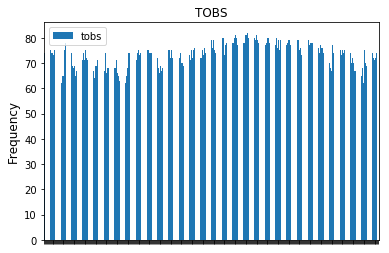

In [30]:
ax = temp_df.plot(kind='bar', title ="TOBS")
ax.set_ylabel("Frequency", fontsize=12)
ax.set_xticklabels([])
plt.show()

In [31]:
#Could not get dates to filter properly. When I set > and < it pulled 0 items

#would have used something like this if I could get my refection of classes to work
#session.query(Measurement.date).\
#    filter(func.strftime("%Y-%m-%d", Measurement.date) == date_str).\
#    filter(>=startdate).\
#    filter(<=enddate).all()
    
    
def calc_temps(startdate,enddate):
    
    #Query not running properly, had to set > enddate to get any data to pull up.
    #I used this data so I could at least finish the assignement
    
    #building querys to find temps
    avg_temp = f'SELECT avg(tobs) FROM measurement where date >= {startdate} and date >= {enddate}'
    max_temp = f'SELECT max(tobs) FROM measurement where date >= {startdate} and date >= {enddate}'
    minimum_temp = f'SELECT min(tobs) FROM measurement where date >= {startdate} and date >= {enddate}'
    #running queries
    mint = engine.execute(minimum_temp).fetchall()
    maxt = engine.execute(max_temp).fetchall()
    avgt = engine.execute(avg_temp).fetchall()
    #creating string to print results
    mint_ = f"Minimum Tempurature {mint}"
    maxt_ = f'Maximum Tempurature {maxt}'
    avgt_ = f'Average Tempurature {avgt}'
    #printing results
    print(mint_)
    print(maxt_)
    print(avgt_)

In [32]:
#running funtion with date range to find temps
x1 = calc_temps('01-01-2016','2014-12-31')

Minimum Tempurature [(53,)]
Maximum Tempurature [(87,)]
Average Tempurature [(72.99486272993427,)]


In [33]:
# set variables from results of function. To build chart
#minimum value
mi=53
#maximum value
ma=87
#average value
av=73

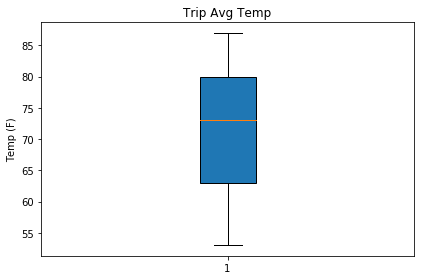

In [34]:
# Plot the min, avg, and max temperature from your previous query
x1 = [mi, ma, av]
fig, ax = plt.subplots()
x = range(len(x1))
ax.boxplot(x1, patch_artist=True)
ax.set_title('Trip Avg Temp')
ax.set_ylabel("Temp (F)")
fig.tight_layout()
plt.show()